<a href="https://colab.research.google.com/github/shubhamgogri/Diabetes_Predicion/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Diabetes-Prediction/master/data/pima-data.csv')
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


dependent feature is diabetes.
while all other are independent features.

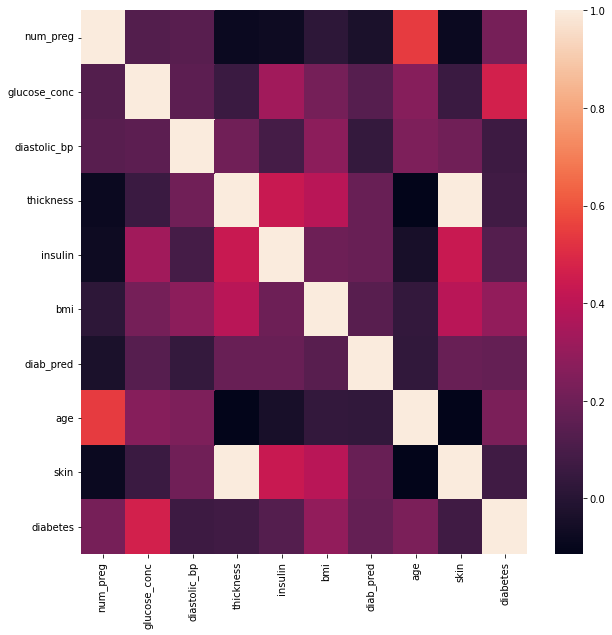

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr())

converting the categorical feature into the numerical form

In [13]:
true_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(true_map)

In [14]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [20]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

Split the dependent and independent feature

In [17]:
X = data.iloc[:, :-1]
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [45]:
y = data['diabetes']

In [46]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

The values in features contain 0 value for which they cant be true.
Hence replace them with the mean

In [21]:
print('numpreg: ', len(X.loc[X['num_preg'] == 0]))
print('glucose_conc: ', len(X.loc[X['glucose_conc'] == 0]))
print('diastolic_bp: ', len(X.loc[X['diastolic_bp'] == 0]))
print('thickness: ', len(X.loc[X['thickness'] == 0]))
print('insulin: ', len(X.loc[X['insulin'] == 0]))

numpreg:  111
glucose_conc:  5
diastolic_bp:  35
thickness:  227
insulin:  374


In [26]:
!pip install sklearn.preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [28]:
for feature in X.columns:
  X[feature] = X[feature].replace(0, X[feature].mean())

In [29]:
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.379000
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1.142600
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.809136
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.906200
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.379000


Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3, random_state = 10)

# RandomForestRegressor


In [76]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state = 10)
randomForest.fit(X_train,y_train)


RandomForestClassifier(random_state=10)

In [80]:
random_prediction = randomForest.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('confusion_matrix ' , confusion_matrix(y_test, random_prediction))
print('accuracy_score ',accuracy_score(y_test, random_prediction))


confusion_matrix  [[289  60]
 [ 81 108]]
accuracy_score  0.7379182156133829


## Randomized SearchCV for hyperParameter tuning

In [54]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [35]:
import xgboost

xgboost = xgboost.XGBClassifier()

In [56]:
random_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [59]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4,
              min_child_weight=5)

In [67]:
import xgboost
classifier = xgboost.XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4,
              min_child_weight=5)

In [69]:
classifier.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4,
              min_child_weight=5)

In [73]:
pred = classifier.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
from sklearn.metrics import accuracy_score

print(accuracy_score(pred, y_test))

0.7490706319702602
